Лабораторная работа №3

Поляков А.В. 20-ИВТ-3

**1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных.
Информация об атрибутах:**

S1 - "Масть первой карты". Порядковый номер (1-4), соответствующий (Червы, Пики, Бубны, Трефы)

C1 - "Ранг первой карты". Числовое (1-13) представление (Туз, 2, 3, ... , Дама, Король)

S2 - "Масть второй карты". Порядковый номер (1-4), соответствующий (Червы, Пики, Бубны, Трефы)

C2 - "Ранг второй карты". Числовое (1-13) представление (Туз, 2, 3, ... , Дама, Король)

S3 - "Масть третьей карты". Порядковый номер (1-4), соответствующий (Червы, Пики, Бубны, Трефы)

C3 - "Ранг третьей карты". Числовое (1-13) представление (Туз, 2, 3, ... , Дама, Король)

S4 - "Масть четвертой карты". Порядковый номер (1-4), соответствующий (Червы, Пики, Бубны, Трефы)

C4 - "Ранг четвертой карты". Числовое (1-13) представление (Туз, 2, 3, ... , Дама, Король)

S5 - "Масть пятой карты". Порядковый номер (1-4), соответствующий (Червы, Пики, Бубны, Трефы)

C5 - "Ранг пятой карты". Числовое (1-13) представление (Туз, 2, 3, ... , Дама, Король)

CLASS "Покерная комбинация". Порядковый номер (0-9)
0.	Старшая карта; не распознанная покерная рука
1.	Пара; две карты одного достоинства
2.	Две пары; две пары карт одного достоинства
3.	Сет; три карты одного достоинства
4.	Стрит; пять последовательно расположенных карт
5.	Флеш; пять карт одной масти
6.	Фулл хаус; три карты одного достоинства и две карты другого
7.	Каре; четыре карты одного достоинства
8.	Стрит флеш; стрит, в котором все пять карт одномастные
9.	Флеш рояль; стрит флеш от десятки до туза


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
poker_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/poker-hand-training-true.data.txt')
poker_df.columns = ['S1', 'C1',
                    'S2', 'C2',
                    'S3', 'C3',
                    'S4', 'C4',
                    'S5', 'C5', 
                    'CLASS']
poker_df

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8
...,...,...,...,...,...,...,...,...,...,...,...
25004,3,9,2,6,4,11,4,12,2,4,0
25005,4,1,4,10,3,13,3,4,1,10,1
25006,2,1,2,10,4,4,4,1,4,13,1
25007,2,12,4,3,1,10,1,12,4,9,1


**2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.**

In [ ]:
print("До удаления дубликатов:    ", poker_df.index.size)
poker_df.drop_duplicates(keep = 'first', inplace = True) 
print("После удаления дубликатов: ", poker_df.index.size)


До удаления дубликатов:     25009
После удаления дубликатов:  25007


**3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)**

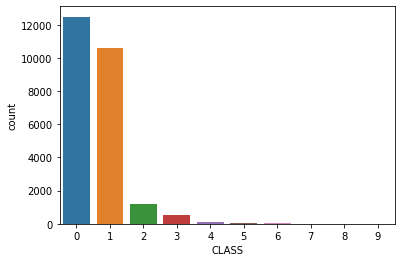

In [ ]:
import seaborn as sns
sns.countplot(x='CLASS', data=poker_df)

4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования

In [ ]:
from sklearn.preprocessing import MinMaxScaler
numericDF = poker_df.drop('CLASS', axis = 1)
numericDF

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,2,11,2,13,2,10,2,12,2,1
1,3,12,3,11,3,13,3,10,3,1
2,4,10,4,11,4,1,4,13,4,12
3,4,1,4,13,4,12,4,11,4,10
4,1,2,1,4,1,5,1,3,1,6
...,...,...,...,...,...,...,...,...,...,...
25004,3,9,2,6,4,11,4,12,2,4
25005,4,1,4,10,3,13,3,4,1,10
25006,2,1,2,10,4,4,4,1,4,13
25007,2,12,4,3,1,10,1,12,4,9


BoxPlot до масштабирования:


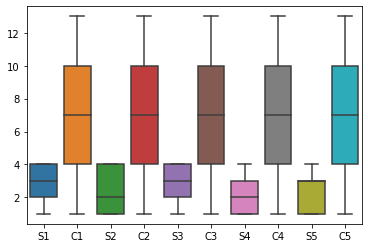

In [ ]:
sns.boxplot(data = numericDF)
print('BoxPlot до масштабирования:')


BoxPlot после масштабирования:


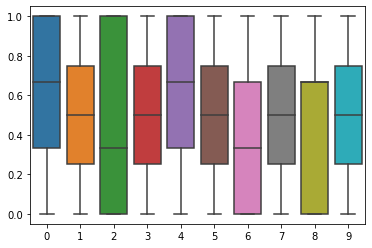

In [ ]:
# Выполняем нормализацию данных
scaler = MinMaxScaler()
scaler.fit(numericDF)
numericDF = scaler.transform(numericDF)

print('BoxPlot после масштабирования:')
sns.boxplot(data = numericDF)

5. Выполните замену категориальных признаков

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
new_ohe_features = ohe.fit_transform(poker_df.CLASS.values.reshape(-1, 1))
tmp = pd.DataFrame(new_ohe_features, columns=['CLASS=' + str(i) for i in range(new_ohe_features.shape[1])])
poker_df1 = pd.concat([poker_df, tmp], axis=1)
poker_df1.drop('CLASS', axis = 1, inplace = True)
poker_df1.dropna(how = 'any', inplace = True)
poker_df1


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS=0,CLASS=1,CLASS=2,CLASS=3,CLASS=4,CLASS=5,CLASS=6,CLASS=7,CLASS=8,CLASS=9
0,2.0,11.0,2.0,13.0,2.0,10.0,2.0,12.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.0,12.0,3.0,11.0,3.0,13.0,3.0,10.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.0,10.0,4.0,11.0,4.0,1.0,4.0,13.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,4.0,13.0,4.0,12.0,4.0,11.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,2.0,1.0,4.0,1.0,5.0,1.0,3.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25002,1.0,12.0,2.0,9.0,2.0,12.0,4.0,8.0,1.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25003,3.0,5.0,3.0,7.0,4.0,11.0,3.0,11.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25004,3.0,9.0,2.0,6.0,4.0,11.0,4.0,12.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25005,4.0,1.0,4.0,10.0,3.0,13.0,3.0,4.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

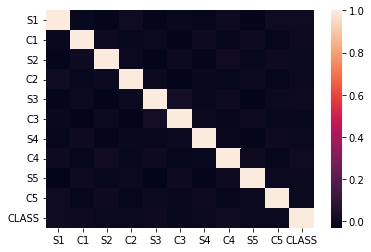

In [ ]:
correlation_df = poker_df.corr()
sns.heatmap(correlation_df)

7. Заполните пропущенные значения в данных

In [ ]:
poker_df.isnull().sum()
# Пропущенных значений нет

S1       0
C1       0
S2       0
C2       0
S3       0
C3       0
S4       0
C4       0
S5       0
C5       0
CLASS    0
dtype: int64

8. Решите поставленную задачу классификации

In [ ]:
# разделим полученные данные на данные для обучения и тестовые
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import RadiusNeighborsClassifier

x = poker_df1.drop(columns=['CLASS=0', 'CLASS=1', 'CLASS=2', 'CLASS=3', 'CLASS=4', 'CLASS=5', 'CLASS=6', 'CLASS=7', 'CLASS=8', 'CLASS=9'], axis=1)
y = poker_df1['CLASS=0']

# Делим базу на тестову выборку и обучающую
#test_size показывает какой объем данных нужно выделить для тестового набора
#random_state сид для случайной генерации
#этот параметр можно использовать для воссоздания определенного результата
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)
rnc = RadiusNeighborsClassifier()
#радиус для поиска параметров
params = {'radius': np.arange(1, 10)}
# Для подбора параметров классификатора используем метод GridSearchCV
rnc_grid = GridSearchCV(rnc, params)
#обучение
rnc_grid.fit(x_train, y_train)

best_radius = rnc_grid.best_estimator_.radius
best_accuracy = rnc_grid.best_score_

rnc = RadiusNeighborsClassifier(radius=best_radius)
#тренировка
rnc.fit(x_train, y_train)
pred = rnc.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred))
print('Best Accuracy:', best_accuracy, ' at radius:', best_radius)


Accuracy: 0.5500899820035993
Best Accuracy: 0.541191839540115  at radius: 5


In [ ]:
#логический классификатор
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
# выбор наилучших параметров для классификатора в диапозоне (размер дерева решений)
params = {'max_depth': list(range(1,12)), 'max_features': list(range(1,12))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit (x_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(x_train, y_train)
accuracy_score  = np.mean(y_test == dtc.predict(x_test))
print(' best:', best_score, "\n", 'at features number:', best_features, "\n", 'at depth:', best_depth)
print(' Accuracy dtc: %.5f' % accuracy_score)


 best: 0.5329936765808548 
 at features number: 10 
 at depth: 8
 Accuracy dtc: 0.52709


In [ ]:
Y = label_binarize(y, classes=[*range(10)])
x_train, x_test, y_train, y_test = train_test_split(x,Y,random_state = 42)

clf = OneVsRestClassifier(RadiusNeighborsClassifier(8))
clf.fit(x_train, y_train)

y_score = clf.predict_proba(x_test)

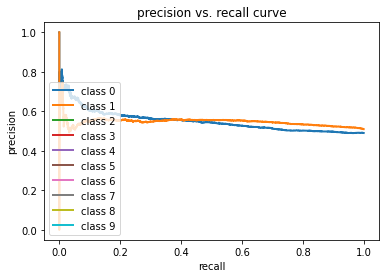

In [ ]:
# PR
precision = dict()
recall = dict()
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

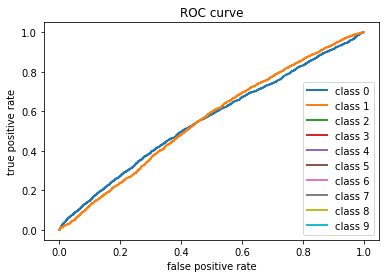

In [ ]:
# ROC
fpr = dict()
tpr = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

Классификаторы имеют примерно одинаковые показатели качества (примерно = 0.53) относительно PR и ROC кривых.